In [1]:
from utils_classiff import create_datasets_and_directories,load_img,plot_random_imgs_from_train,plot_history
import os
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


2023-05-26 16:19:06.357875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 16:19:06.435896: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-26 16:19:06.818969: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/basile/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-26 16:19:06.819070: W te

In [2]:
#
# 



os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2023-05-26 16:19:09.051445: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-26 16:19:09.055422: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-26 16:19:09.055559: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Load data

In [3]:
##### PARAMETERS #####
PATH_TO_DATASET ="/home/basile/Documents/projet_bees_detection_basile/bees_detection/src/datafiles/final_datafiles/dataset_yolo_cropped_with_cleaned_structure.csv"
OUTPUT_FOLDER = "/home/basile/Documents/projet_bees_detection_basile/data_bees_detection/benchmark_classification/2_Resnet_300_imgs_2_species/"
IMG_SIZE = 256
CAP = 20000
NB_IMG_TO_KEEP = 300    
BACTH_SIZE = 16
##### PARAMETERS #####

# Create the datasets and directories
train_dataset, val_dataset, test_dataset=create_datasets_and_directories(path_to_csv=PATH_TO_DATASET, path_to_output=OUTPUT_FOLDER, image_size=IMG_SIZE, cap=CAP, nb_img_to_keep=NB_IMG_TO_KEEP)

list = ['train', 'test', 'validation']
CLASSES = train_dataset.class_names
NB_CLASSES = len(CLASSES)



paths = [os.path.join(OUTPUT_FOLDER, i) for i in list]

x_train, y_train = load_img(paths[0],img_size = IMG_SIZE,classes = CLASSES)
x_test, y_test = load_img(paths[1],img_size = IMG_SIZE,classes = CLASSES)
x_val, y_val = load_img(paths[2],img_size = IMG_SIZE,classes = CLASSES)

# Normalisation des entrées via une division par 255 des valeurs de pixel.
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

UnboundLocalError: local variable 'species_to_keep' referenced before assignment

Make first simplest network

In [4]:
#vgg conv base
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)) 



#model
x = conv_base.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(NB_CLASSES, activation="softmax")(x)

model = Model(inputs=conv_base.input, outputs=predictions)

#compile
opti = Adam(learning_rate=0.0001)
model.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=BACTH_SIZE, validation_data=(x_val, y_val))

Epoch 1/10


2023-05-26 11:45:33.530853: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-26 11:45:34.099393: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-26 11:45:35.127884: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 2432696320 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 567869440/4104454144
2023-05-26 11:45:35.127911: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1442372433
MaxInUse:                   1822892625
NumAllocs:                         278
MaxAllocSize:                649096192
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:35.127924: E t

 1/27 [>.............................] - ETA: 7:34 - loss: 0.8076 - accuracy: 0.4375

2023-05-26 11:45:49.736255: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:45:49.736279: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        1077
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:49.736290: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:49.736293: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 2/27 [=>............................] - ETA: 16s - loss: 1.5492 - accuracy: 0.5625 

2023-05-26 11:45:50.412958: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:45:50.412982: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        1314
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:50.412993: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:50.412996: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 3/27 [==>...........................] - ETA: 16s - loss: 1.5312 - accuracy: 0.5417

2023-05-26 11:45:51.093318: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 171507712/4104454144
2023-05-26 11:45:51.093341: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        1551
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:51.093351: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:51.093354: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 4/27 [===>..........................] - ETA: 15s - loss: 1.3381 - accuracy: 0.5469

2023-05-26 11:45:51.778488: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:45:51.778509: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        1760
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:51.778520: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:51.778524: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 5/27 [====>.........................] - ETA: 15s - loss: 1.2133 - accuracy: 0.5375

2023-05-26 11:45:52.573161: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:45:52.573184: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        2023
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:52.573194: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:52.573197: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 6/27 [=====>........................] - ETA: 14s - loss: 1.1577 - accuracy: 0.5000

2023-05-26 11:45:53.251531: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:45:53.251552: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        2232
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:53.251562: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:53.251565: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 7/27 [======>.......................] - ETA: 14s - loss: 1.0959 - accuracy: 0.5000

2023-05-26 11:45:54.039257: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:45:54.039280: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        2467
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:54.039291: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:54.039294: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 8/27 [=======>......................] - ETA: 13s - loss: 1.0434 - accuracy: 0.5156

2023-05-26 11:45:54.896119: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:45:54.896148: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        2728
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:54.896164: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:54.896170: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 9/27 [=========>....................] - ETA: 13s - loss: 1.0208 - accuracy: 0.4931

2023-05-26 11:45:55.576539: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:45:55.576562: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        2937
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:55.576572: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:55.576575: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

10/27 [==========>...................] - ETA: 12s - loss: 0.9908 - accuracy: 0.4875

2023-05-26 11:45:56.426866: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:45:56.426904: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        3198
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:56.426944: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:56.426958: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

11/27 [===========>..................] - ETA: 11s - loss: 0.9638 - accuracy: 0.4943

2023-05-26 11:45:57.109078: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 473497600/4104454144
2023-05-26 11:45:57.109102: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        3407
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:57.109113: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:57.109116: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

12/27 [============>.................] - ETA: 11s - loss: 0.9334 - accuracy: 0.5104

2023-05-26 11:45:57.902817: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:45:57.902837: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        3642
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:57.902847: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:57.902851: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

13/27 [=============>................] - ETA: 10s - loss: 0.9134 - accuracy: 0.5192

2023-05-26 11:45:58.691786: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 473497600/4104454144
2023-05-26 11:45:58.691813: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        3877
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:58.691824: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:58.691827: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

14/27 [==============>...............] - ETA: 9s - loss: 0.8962 - accuracy: 0.5268 

2023-05-26 11:45:59.487750: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:45:59.487775: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        4140
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:45:59.487786: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:45:59.487789: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

15/27 [===============>..............] - ETA: 8s - loss: 0.8893 - accuracy: 0.5208

2023-05-26 11:46:00.169578: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:46:00.169599: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        4377
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:00.169610: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:00.169613: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

16/27 [================>.............] - ETA: 8s - loss: 0.8822 - accuracy: 0.5039

2023-05-26 11:46:00.846048: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:46:00.846069: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        4614
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:00.846080: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:00.846083: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

17/27 [=================>............] - ETA: 7s - loss: 0.8702 - accuracy: 0.5000

2023-05-26 11:46:01.531955: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 171507712/4104454144
2023-05-26 11:46:01.531975: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        4851
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:01.531985: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:01.531988: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

18/27 [===================>..........] - ETA: 6s - loss: 0.8622 - accuracy: 0.5035

2023-05-26 11:46:02.209323: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:46:02.209346: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        5060
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:02.209356: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:02.209359: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

19/27 [====================>.........] - ETA: 5s - loss: 0.8482 - accuracy: 0.5132

2023-05-26 11:46:03.001816: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:03.001838: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        5295
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:03.001848: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:03.001851: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

20/27 [=====================>........] - ETA: 5s - loss: 0.8434 - accuracy: 0.5094

2023-05-26 11:46:03.859168: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 507052032/4104454144
2023-05-26 11:46:03.859198: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        5528
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:03.859216: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:03.859223: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

21/27 [======================>.......] - ETA: 4s - loss: 0.8386 - accuracy: 0.5060

2023-05-26 11:46:04.650605: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 473497600/4104454144
2023-05-26 11:46:04.650628: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        5763
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:04.650638: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:04.650641: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

22/27 [=======================>......] - ETA: 3s - loss: 0.8332 - accuracy: 0.5057

2023-05-26 11:46:05.445956: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 473497600/4104454144
2023-05-26 11:46:05.445976: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        5998
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:05.445986: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:05.445990: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

23/27 [========================>.....] - ETA: 2s - loss: 0.8265 - accuracy: 0.5082

2023-05-26 11:46:06.241448: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 473497600/4104454144
2023-05-26 11:46:06.241468: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1761581677
MaxInUse:                   2868878161
NumAllocs:                        6233
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:06.241478: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:06.241481: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

24/27 [=========================>....] - ETA: 2s - loss: 0.8192 - accuracy: 0.5156

2023-05-26 11:46:07.036203: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:46:07.036225: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        6496
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:07.036236: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:07.036239: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

25/27 [==========================>...] - ETA: 1s - loss: 0.8132 - accuracy: 0.5175

2023-05-26 11:46:07.721146: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 171507712/4104454144
2023-05-26 11:46:07.721183: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1425742445
MaxInUse:                   2868878161
NumAllocs:                        6733
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:07.721195: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:07.721199: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

26/27 [===========================>..] - ETA: 0s - loss: 0.8091 - accuracy: 0.5096

2023-05-26 11:46:11.363803: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 2325741568 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 507052032/4104454144
2023-05-26 11:46:11.363833: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                       949394089
MaxInUse:                   2868878161
NumAllocs:                        6898
MaxAllocSize:               1225326592
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:11.363848: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:11.363852: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

27/27 [==============================] - 49s 1s/step - loss: 0.8079 - accuracy: 0.5071 - val_loss: 0.6970 - val_accuracy: 0.5222
Epoch 2/10


2023-05-26 11:46:21.338959: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 2352480256 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 507052032/4104454144
2023-05-26 11:46:21.338985: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                       720281793
MaxInUse:                   2868878161
NumAllocs:                        7792
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:21.338997: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:21.339000: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 1/27 [>.............................] - ETA: 17s - loss: 0.6849 - accuracy: 0.4375

2023-05-26 11:46:22.356691: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:22.356712: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                        8295
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:22.356723: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:22.356726: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 2/27 [=>............................] - ETA: 17s - loss: 0.7076 - accuracy: 0.4062

2023-05-26 11:46:23.037057: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:46:23.037078: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                        8504
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:23.037088: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:23.037091: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 3/27 [==>...........................] - ETA: 17s - loss: 0.6964 - accuracy: 0.4375

2023-05-26 11:46:23.840324: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:46:23.840346: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                        8767
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:23.840357: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:23.840359: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 4/27 [===>..........................] - ETA: 16s - loss: 0.7003 - accuracy: 0.4375

2023-05-26 11:46:24.533521: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:46:24.533545: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                        9004
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:24.533557: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:24.533560: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 5/27 [====>.........................] - ETA: 15s - loss: 0.6955 - accuracy: 0.4875

2023-05-26 11:46:25.217121: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:25.217145: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                        9213
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:25.217156: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:25.217159: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 6/27 [=====>........................] - ETA: 15s - loss: 0.6933 - accuracy: 0.4896

2023-05-26 11:46:26.020173: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:46:26.020196: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                        9448
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:26.020206: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:26.020209: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 7/27 [======>.......................] - ETA: 14s - loss: 0.6945 - accuracy: 0.5000

2023-05-26 11:46:26.823847: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:46:26.823868: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                        9683
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:26.823879: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:26.823882: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 8/27 [=======>......................] - ETA: 14s - loss: 0.6922 - accuracy: 0.5000

2023-05-26 11:46:27.685819: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:46:27.685840: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                        9916
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:27.685852: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:27.685855: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 9/27 [=========>....................] - ETA: 13s - loss: 0.6894 - accuracy: 0.5139

2023-05-26 11:46:28.490024: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:46:28.490046: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       10151
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:28.490059: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:28.490063: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

10/27 [==========>...................] - ETA: 13s - loss: 0.6876 - accuracy: 0.5250

2023-05-26 11:46:29.356431: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:46:29.356463: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       10384
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:29.356479: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:29.356485: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

11/27 [===========>..................] - ETA: 12s - loss: 0.6901 - accuracy: 0.5170

2023-05-26 11:46:30.160336: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:46:30.160361: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       10619
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:30.160373: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:30.160376: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

12/27 [============>.................] - ETA: 11s - loss: 0.6869 - accuracy: 0.5312

2023-05-26 11:46:31.024479: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:46:31.024516: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       10852
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:31.024534: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:31.024538: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

13/27 [=============>................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5192

2023-05-26 11:46:31.829682: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:46:31.829714: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       11115
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:31.829728: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:31.829731: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

14/27 [==============>...............] - ETA: 10s - loss: 0.6912 - accuracy: 0.5179

2023-05-26 11:46:32.520450: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:32.520472: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       11324
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:32.520482: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:32.520485: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

15/27 [===============>..............] - ETA: 9s - loss: 0.6918 - accuracy: 0.5167 

2023-05-26 11:46:33.324565: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:46:33.324587: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       11587
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:33.324598: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:33.324601: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

16/27 [================>.............] - ETA: 8s - loss: 0.6893 - accuracy: 0.5195

2023-05-26 11:46:34.025525: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:46:34.025553: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       11824
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:34.025571: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:34.025578: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

17/27 [=================>............] - ETA: 7s - loss: 0.6885 - accuracy: 0.5257

2023-05-26 11:46:34.714237: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:34.714274: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       12033
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:34.714291: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:34.714296: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

18/27 [===================>..........] - ETA: 6s - loss: 0.6879 - accuracy: 0.5312

2023-05-26 11:46:35.516609: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:35.516631: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       12268
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:35.516644: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:35.516647: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

19/27 [====================>.........] - ETA: 6s - loss: 0.6866 - accuracy: 0.5395

2023-05-26 11:46:36.322004: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:46:36.322027: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       12503
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:36.322038: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:36.322041: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

20/27 [=====================>........] - ETA: 5s - loss: 0.6870 - accuracy: 0.5375

2023-05-26 11:46:37.127549: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:46:37.127573: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       12738
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:37.127585: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:37.127588: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

21/27 [======================>.......] - ETA: 4s - loss: 0.6870 - accuracy: 0.5327

2023-05-26 11:46:37.992777: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:46:37.992801: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       12999
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:37.992811: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:37.992817: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

22/27 [=======================>......] - ETA: 3s - loss: 0.6858 - accuracy: 0.5369

2023-05-26 11:46:38.689437: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:46:38.689458: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       13236
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:38.689469: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:38.689472: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

23/27 [========================>.....] - ETA: 3s - loss: 0.6854 - accuracy: 0.5408

2023-05-26 11:46:39.386329: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:39.386361: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       13445
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:39.386379: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:39.386387: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

24/27 [=========================>....] - ETA: 2s - loss: 0.6856 - accuracy: 0.5469

2023-05-26 11:46:40.184236: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:40.184259: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       13680
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:40.184270: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:40.184276: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

25/27 [==========================>...] - ETA: 1s - loss: 0.6842 - accuracy: 0.5550

2023-05-26 11:46:40.996910: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:46:40.996935: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       13943
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:40.996946: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:40.996949: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

27/27 [==============================] - 21s 798ms/step - loss: 0.6867 - accuracy: 0.5524 - val_loss: 0.6949 - val_accuracy: 0.4889
Epoch 3/10


2023-05-26 11:46:43.100981: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:43.101003: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       14862
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:43.101014: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:43.101016: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 1/27 [>.............................] - ETA: 17s - loss: 0.5934 - accuracy: 0.8125

2023-05-26 11:46:43.787796: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:46:43.787817: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       15071
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:43.787829: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:43.787831: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 2/27 [=>............................] - ETA: 20s - loss: 0.6472 - accuracy: 0.7188

2023-05-26 11:46:44.594976: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:46:44.594999: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       15306
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:44.595009: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:44.595012: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 3/27 [==>...........................] - ETA: 20s - loss: 0.6376 - accuracy: 0.7292

2023-05-26 11:46:45.464514: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:46:45.464535: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       15567
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:45.464545: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:45.464548: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 4/27 [===>..........................] - ETA: 18s - loss: 0.6377 - accuracy: 0.7188

2023-05-26 11:46:46.156307: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:46.156332: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       15776
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:46.156343: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:46.156347: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 5/27 [====>.........................] - ETA: 17s - loss: 0.6530 - accuracy: 0.6750

2023-05-26 11:46:46.961366: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:46:46.961390: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       16039
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:46.961401: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:46.961405: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 6/27 [=====>........................] - ETA: 16s - loss: 0.6587 - accuracy: 0.6562

2023-05-26 11:46:47.654941: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:46:47.654962: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       16276
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:47.654973: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:47.654976: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 7/27 [======>.......................] - ETA: 15s - loss: 0.6620 - accuracy: 0.6339

2023-05-26 11:46:48.347105: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:46:48.347131: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       16485
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:48.347142: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:48.347146: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 8/27 [=======>......................] - ETA: 14s - loss: 0.6772 - accuracy: 0.6250

2023-05-26 11:46:49.150861: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:46:49.150889: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       16720
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:49.150901: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:49.150904: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 9/27 [=========>....................] - ETA: 14s - loss: 0.6838 - accuracy: 0.6042

2023-05-26 11:46:50.021428: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:46:50.021457: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       16981
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:50.021474: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:50.021481: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

10/27 [==========>...................] - ETA: 13s - loss: 0.6745 - accuracy: 0.6125

2023-05-26 11:46:50.716509: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:46:50.716534: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       17218
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:50.716544: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:50.716547: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

11/27 [===========>..................] - ETA: 12s - loss: 0.6776 - accuracy: 0.6136

2023-05-26 11:46:51.407958: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:46:51.407983: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       17427
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:51.407996: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:51.407999: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

12/27 [============>.................] - ETA: 11s - loss: 0.6731 - accuracy: 0.6042

2023-05-26 11:46:52.211362: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:46:52.211383: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       17690
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:52.211394: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:52.211397: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

13/27 [=============>................] - ETA: 10s - loss: 0.6729 - accuracy: 0.6106

2023-05-26 11:46:52.909276: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:52.909298: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       17927
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:52.909310: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:52.909313: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

14/27 [==============>...............] - ETA: 9s - loss: 0.6805 - accuracy: 0.6027 

2023-05-26 11:46:53.593947: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:46:53.593973: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       18136
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:53.593985: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:53.593989: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

15/27 [===============>..............] - ETA: 9s - loss: 0.6932 - accuracy: 0.5917

2023-05-26 11:46:54.395252: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:46:54.395285: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       18399
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:54.395301: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:54.395308: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

16/27 [================>.............] - ETA: 8s - loss: 0.6884 - accuracy: 0.6016

2023-05-26 11:46:55.089831: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:46:55.089853: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       18636
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:55.089865: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:55.089868: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

17/27 [=================>............] - ETA: 7s - loss: 0.6826 - accuracy: 0.6140

2023-05-26 11:46:55.782278: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:46:55.782304: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       18873
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:55.782316: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:55.782319: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

18/27 [===================>..........] - ETA: 6s - loss: 0.6836 - accuracy: 0.6111

2023-05-26 11:46:56.470081: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:46:56.470105: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       19110
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:56.470117: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:56.470120: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

19/27 [====================>.........] - ETA: 5s - loss: 0.6862 - accuracy: 0.5954

2023-05-26 11:46:57.162546: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:46:57.162568: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       19319
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:57.162580: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:57.162583: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

20/27 [=====================>........] - ETA: 5s - loss: 0.6844 - accuracy: 0.6000

2023-05-26 11:46:57.964086: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:46:57.964107: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       19582
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:57.964118: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:57.964122: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

21/27 [======================>.......] - ETA: 4s - loss: 0.6805 - accuracy: 0.6131

2023-05-26 11:46:58.656651: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:46:58.656673: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       19819
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:58.656683: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:58.656686: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

22/27 [=======================>......] - ETA: 3s - loss: 0.6828 - accuracy: 0.6051

2023-05-26 11:46:59.345962: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:46:59.345987: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       20056
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:46:59.345999: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:46:59.346002: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

23/27 [========================>.....] - ETA: 2s - loss: 0.6816 - accuracy: 0.6087

2023-05-26 11:47:00.035369: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:47:00.035393: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       20293
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:00.035406: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:00.035410: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

24/27 [=========================>....] - ETA: 2s - loss: 0.6828 - accuracy: 0.5990

2023-05-26 11:47:00.726928: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:47:00.726950: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       20502
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:00.726962: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:00.726965: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

25/27 [==========================>...] - ETA: 1s - loss: 0.6807 - accuracy: 0.6025

2023-05-26 11:47:01.527314: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:01.527341: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       20765
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:01.527353: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:01.527356: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

27/27 [==============================] - 21s 763ms/step - loss: 0.6809 - accuracy: 0.6000 - val_loss: 0.6870 - val_accuracy: 0.5222
Epoch 4/10


2023-05-26 11:47:03.625671: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:47:03.625708: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       21684
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:03.625729: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:03.625737: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 1/27 [>.............................] - ETA: 17s - loss: 0.6522 - accuracy: 0.5625

2023-05-26 11:47:04.304713: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:47:04.304744: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       21893
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:04.304756: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:04.304761: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 2/27 [=>............................] - ETA: 19s - loss: 0.7019 - accuracy: 0.5000

2023-05-26 11:47:05.108099: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:47:05.108122: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       22156
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:05.108134: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:05.108138: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 3/27 [==>...........................] - ETA: 17s - loss: 0.7145 - accuracy: 0.4583

2023-05-26 11:47:05.788868: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:47:05.788895: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       22365
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:05.788907: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:05.788911: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 4/27 [===>..........................] - ETA: 17s - loss: 0.6960 - accuracy: 0.5000

2023-05-26 11:47:06.583799: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:47:06.583824: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       22600
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:06.583836: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:06.583840: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 5/27 [====>.........................] - ETA: 17s - loss: 0.6863 - accuracy: 0.5625

2023-05-26 11:47:07.442982: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:47:07.443004: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       22833
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:07.443015: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:07.443018: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 6/27 [=====>........................] - ETA: 16s - loss: 0.6879 - accuracy: 0.5417

2023-05-26 11:47:08.240896: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:47:08.240920: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       23068
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:08.240930: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:08.240934: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 7/27 [======>.......................] - ETA: 15s - loss: 0.6858 - accuracy: 0.5446

2023-05-26 11:47:09.103184: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:09.103211: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       23329
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:09.103224: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:09.103228: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 8/27 [=======>......................] - ETA: 14s - loss: 0.6825 - accuracy: 0.5547

2023-05-26 11:47:09.785857: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:47:09.785885: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       23566
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:09.785897: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:09.785900: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 9/27 [=========>....................] - ETA: 13s - loss: 0.6835 - accuracy: 0.5625

2023-05-26 11:47:10.469369: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:10.469393: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       23775
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:10.469408: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:10.469412: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

10/27 [==========>...................] - ETA: 13s - loss: 0.6764 - accuracy: 0.5750

2023-05-26 11:47:11.265237: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:47:11.265259: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       24010
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:11.265271: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:11.265275: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

11/27 [===========>..................] - ETA: 12s - loss: 0.6717 - accuracy: 0.5795

2023-05-26 11:47:12.061490: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:12.061514: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       24245
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:12.061527: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:12.061531: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

12/27 [============>.................] - ETA: 11s - loss: 0.6739 - accuracy: 0.5885

2023-05-26 11:47:12.860712: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:12.860741: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       24508
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:12.860754: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:12.860758: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

13/27 [=============>................] - ETA: 10s - loss: 0.6810 - accuracy: 0.5721

2023-05-26 11:47:13.543001: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:13.543024: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       24717
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:13.543037: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:13.543041: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

14/27 [==============>...............] - ETA: 10s - loss: 0.6767 - accuracy: 0.5759

2023-05-26 11:47:14.339821: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:14.339842: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       24980
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:14.339852: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:14.339855: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

15/27 [===============>..............] - ETA: 9s - loss: 0.6757 - accuracy: 0.5833 

2023-05-26 11:47:15.026139: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:15.026164: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       25189
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:15.026175: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:15.026179: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

16/27 [================>.............] - ETA: 8s - loss: 0.6701 - accuracy: 0.5977

2023-05-26 11:47:15.819439: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:47:15.819463: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       25424
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:15.819474: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:15.819478: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

17/27 [=================>............] - ETA: 7s - loss: 0.6654 - accuracy: 0.6029

2023-05-26 11:47:16.617189: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:16.617211: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       25687
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:16.617222: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:16.617225: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

18/27 [===================>..........] - ETA: 6s - loss: 0.6687 - accuracy: 0.6007

2023-05-26 11:47:17.302191: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:17.302217: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       25896
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:17.302228: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:17.302236: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

19/27 [====================>.........] - ETA: 6s - loss: 0.6677 - accuracy: 0.6020

2023-05-26 11:47:18.160431: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:18.160455: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       26129
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:18.160465: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:18.160470: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

20/27 [=====================>........] - ETA: 5s - loss: 0.6645 - accuracy: 0.6062

2023-05-26 11:47:18.961835: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:18.961859: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       26364
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:18.961870: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:18.961873: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

21/27 [======================>.......] - ETA: 4s - loss: 0.6652 - accuracy: 0.6012

2023-05-26 11:47:19.759684: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:47:19.759707: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       26599
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:19.759718: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:19.759721: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

22/27 [=======================>......] - ETA: 3s - loss: 0.6593 - accuracy: 0.6108

2023-05-26 11:47:20.555169: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:47:20.555191: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       26834
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:20.555202: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:20.555206: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

23/27 [========================>.....] - ETA: 3s - loss: 0.6572 - accuracy: 0.6168

2023-05-26 11:47:21.409658: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:21.409681: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       27095
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:21.409693: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:21.409696: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

24/27 [=========================>....] - ETA: 2s - loss: 0.6545 - accuracy: 0.6250

2023-05-26 11:47:22.097227: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:47:22.097250: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       27332
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:22.097259: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:22.097263: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

25/27 [==========================>...] - ETA: 1s - loss: 0.6544 - accuracy: 0.6250

2023-05-26 11:47:22.786397: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:47:22.786418: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       27569
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:22.786428: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:22.786431: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

27/27 [==============================] - 21s 791ms/step - loss: 0.6602 - accuracy: 0.6143 - val_loss: 0.6952 - val_accuracy: 0.5556
Epoch 5/10


2023-05-26 11:47:24.870143: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:24.870163: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       28460
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:24.870174: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:24.870177: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 1/27 [>.............................] - ETA: 22s - loss: 0.6493 - accuracy: 0.5625

2023-05-26 11:47:25.735774: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:47:25.735796: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       28693
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:25.735808: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:25.735812: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 2/27 [=>............................] - ETA: 21s - loss: 0.5865 - accuracy: 0.6875

2023-05-26 11:47:26.600291: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:26.600313: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       28954
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:26.600323: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:26.600326: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 3/27 [==>...........................] - ETA: 18s - loss: 0.6020 - accuracy: 0.6875

2023-05-26 11:47:27.293347: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:47:27.293370: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       29191
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:27.293381: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:27.293384: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 4/27 [===>..........................] - ETA: 17s - loss: 0.5868 - accuracy: 0.6875

2023-05-26 11:47:27.977750: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:27.977775: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       29400
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:27.977786: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:27.977789: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 5/27 [====>.........................] - ETA: 16s - loss: 0.5839 - accuracy: 0.6875

2023-05-26 11:47:28.777604: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:28.777626: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       29663
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:28.777636: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:28.777640: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 6/27 [=====>........................] - ETA: 15s - loss: 0.5969 - accuracy: 0.6875

2023-05-26 11:47:29.464834: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:47:29.464858: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       29900
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:29.464869: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:29.464872: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 7/27 [======>.......................] - ETA: 14s - loss: 0.6165 - accuracy: 0.6607

2023-05-26 11:47:30.148417: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:47:30.148439: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       30137
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:30.148449: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:30.148452: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 8/27 [=======>......................] - ETA: 13s - loss: 0.6111 - accuracy: 0.6719

2023-05-26 11:47:30.835220: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 37289984/4104454144
2023-05-26 11:47:30.835241: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       30374
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:30.835251: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:30.835254: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 9/27 [=========>....................] - ETA: 13s - loss: 0.6133 - accuracy: 0.6667

2023-05-26 11:47:31.522418: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:31.522441: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       30583
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:31.522452: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:31.522455: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

10/27 [==========>...................] - ETA: 12s - loss: 0.6134 - accuracy: 0.6625

2023-05-26 11:47:32.318753: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:47:32.318779: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       30818
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:32.318790: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:32.318793: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

11/27 [===========>..................] - ETA: 11s - loss: 0.6242 - accuracy: 0.6420

2023-05-26 11:47:33.120795: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:33.120818: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       31081
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:33.120829: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:33.120832: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

12/27 [============>.................] - ETA: 10s - loss: 0.6225 - accuracy: 0.6458

2023-05-26 11:47:33.811202: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:47:33.811223: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       31318
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:33.811234: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:33.811237: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

13/27 [=============>................] - ETA: 10s - loss: 0.6183 - accuracy: 0.6587

2023-05-26 11:47:34.492731: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:34.492755: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       31527
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:34.492766: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:34.492769: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

14/27 [==============>...............] - ETA: 9s - loss: 0.6147 - accuracy: 0.6652 

2023-05-26 11:47:35.291844: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:35.291864: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       31790
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:35.291874: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:35.291877: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

15/27 [===============>..............] - ETA: 8s - loss: 0.6044 - accuracy: 0.6792

2023-05-26 11:47:35.982003: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:47:35.982025: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       32027
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:35.982036: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:35.982039: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

16/27 [================>.............] - ETA: 8s - loss: 0.6023 - accuracy: 0.6797

2023-05-26 11:47:36.668816: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:47:36.668837: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       32236
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:36.668849: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:36.668851: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

17/27 [=================>............] - ETA: 7s - loss: 0.6056 - accuracy: 0.6801

2023-05-26 11:47:37.467739: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:37.467761: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       32499
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:37.467772: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:37.467775: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

18/27 [===================>..........] - ETA: 6s - loss: 0.6067 - accuracy: 0.6806

2023-05-26 11:47:38.156908: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:38.156931: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       32708
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:38.156941: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:38.156944: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

19/27 [====================>.........] - ETA: 5s - loss: 0.5998 - accuracy: 0.6875

2023-05-26 11:47:39.020515: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:39.020547: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       32941
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:39.020563: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:39.020569: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

20/27 [=====================>........] - ETA: 5s - loss: 0.5967 - accuracy: 0.6969

2023-05-26 11:47:39.823494: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:39.823515: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       33176
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:39.823526: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:39.823529: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

21/27 [======================>.......] - ETA: 4s - loss: 0.6118 - accuracy: 0.6964

2023-05-26 11:47:40.626677: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:40.626702: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       33439
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:40.626712: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:40.626715: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

22/27 [=======================>......] - ETA: 3s - loss: 0.6057 - accuracy: 0.6989

2023-05-26 11:47:41.315842: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:47:41.315864: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       33676
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:41.315874: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:41.315877: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

23/27 [========================>.....] - ETA: 2s - loss: 0.6158 - accuracy: 0.6929

2023-05-26 11:47:42.005389: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:42.005411: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       33885
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:42.005423: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:42.005426: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

24/27 [=========================>....] - ETA: 2s - loss: 0.6101 - accuracy: 0.7031

2023-05-26 11:47:42.809441: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:47:42.809464: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       34148
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:42.809475: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:42.809478: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

25/27 [==========================>...] - ETA: 1s - loss: 0.6106 - accuracy: 0.7025

2023-05-26 11:47:43.495444: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:47:43.495465: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       34385
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:43.495476: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:43.495479: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

27/27 [==============================] - 21s 763ms/step - loss: 0.6065 - accuracy: 0.7000 - val_loss: 0.7063 - val_accuracy: 0.5222
Epoch 6/10


2023-05-26 11:47:45.584978: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:45.585005: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       35276
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:45.585015: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:45.585021: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 1/27 [>.............................] - ETA: 22s - loss: 0.5836 - accuracy: 0.7500

2023-05-26 11:47:46.453937: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:47:46.453968: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       35509
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:46.453979: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:46.453982: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 2/27 [=>............................] - ETA: 21s - loss: 0.6105 - accuracy: 0.6875

2023-05-26 11:47:47.315391: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:47.315415: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       35770
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:47.315425: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:47.315428: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 3/27 [==>...........................] - ETA: 18s - loss: 0.5756 - accuracy: 0.7083

2023-05-26 11:47:48.011143: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:47:48.011166: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       36007
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:48.011176: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:48.011179: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 4/27 [===>..........................] - ETA: 17s - loss: 0.6304 - accuracy: 0.6719

2023-05-26 11:47:48.698606: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:47:48.698631: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       36244
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:48.698642: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:48.698645: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 5/27 [====>.........................] - ETA: 16s - loss: 0.6383 - accuracy: 0.6500

2023-05-26 11:47:49.384444: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:49.384465: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       36453
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:49.384477: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:49.384479: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 6/27 [=====>........................] - ETA: 15s - loss: 0.6582 - accuracy: 0.6250

2023-05-26 11:47:50.183269: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:50.183292: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       36688
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:50.183303: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:50.183306: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 7/27 [======>.......................] - ETA: 15s - loss: 0.6706 - accuracy: 0.5982

2023-05-26 11:47:50.985797: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:47:50.985820: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       36923
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:50.985832: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:50.985835: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 8/27 [=======>......................] - ETA: 14s - loss: 0.6632 - accuracy: 0.6172

2023-05-26 11:47:51.788259: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:47:51.788285: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       37158
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:51.788295: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:51.788298: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 9/27 [=========>....................] - ETA: 13s - loss: 0.6531 - accuracy: 0.6250

2023-05-26 11:47:52.646210: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:47:52.646232: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       37391
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:52.646243: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:52.646246: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

10/27 [==========>...................] - ETA: 13s - loss: 0.6598 - accuracy: 0.6125

2023-05-26 11:47:53.448896: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:47:53.448926: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       37654
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:53.448942: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:53.448948: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

11/27 [===========>..................] - ETA: 12s - loss: 0.6535 - accuracy: 0.6307

2023-05-26 11:47:54.138367: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:54.138400: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       37891
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:54.138410: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:54.138413: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

12/27 [============>.................] - ETA: 11s - loss: 0.6422 - accuracy: 0.6510

2023-05-26 11:47:54.816544: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:47:54.816567: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       38100
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:54.816578: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:54.816581: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

13/27 [=============>................] - ETA: 10s - loss: 0.6371 - accuracy: 0.6635

2023-05-26 11:47:55.615757: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:47:55.615779: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       38363
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:55.615790: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:55.615793: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

14/27 [==============>...............] - ETA: 9s - loss: 0.6346 - accuracy: 0.6607 

2023-05-26 11:47:56.305448: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:47:56.305470: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       38572
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:56.305482: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:56.305485: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

15/27 [===============>..............] - ETA: 9s - loss: 0.6209 - accuracy: 0.6708

2023-05-26 11:47:57.101186: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:47:57.101214: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       38807
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:57.101225: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:57.101228: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

16/27 [================>.............] - ETA: 8s - loss: 0.6099 - accuracy: 0.6758

2023-05-26 11:47:57.899947: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:47:57.899975: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       39042
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:57.899986: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:57.899989: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

17/27 [=================>............] - ETA: 7s - loss: 0.6113 - accuracy: 0.6728

2023-05-26 11:47:58.759446: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:47:58.759469: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       39275
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:58.759480: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:58.759483: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

18/27 [===================>..........] - ETA: 6s - loss: 0.6262 - accuracy: 0.6701

2023-05-26 11:47:59.557662: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:47:59.557683: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       39510
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:47:59.557694: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:47:59.557697: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

19/27 [====================>.........] - ETA: 6s - loss: 0.6311 - accuracy: 0.6743

2023-05-26 11:48:00.416847: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:48:00.416868: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       39771
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:00.416878: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:00.416881: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

20/27 [=====================>........] - ETA: 5s - loss: 0.6401 - accuracy: 0.6781

2023-05-26 11:48:01.105215: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:48:01.105244: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       40008
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:01.105261: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:01.105268: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

21/27 [======================>.......] - ETA: 4s - loss: 0.6354 - accuracy: 0.6756

2023-05-26 11:48:01.788510: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:01.788533: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       40217
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:01.788544: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:01.788547: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

22/27 [=======================>......] - ETA: 3s - loss: 0.6254 - accuracy: 0.6847

2023-05-26 11:48:02.584818: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:02.584845: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       40480
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:02.584855: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:02.584859: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

23/27 [========================>.....] - ETA: 3s - loss: 0.6196 - accuracy: 0.6929

2023-05-26 11:48:03.279573: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:03.279594: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       40717
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:03.279605: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:03.279608: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

24/27 [=========================>....] - ETA: 2s - loss: 0.6118 - accuracy: 0.6979

2023-05-26 11:48:03.964271: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:03.964296: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       40954
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:03.964307: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:03.964309: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

25/27 [==========================>...] - ETA: 1s - loss: 0.6153 - accuracy: 0.6925

2023-05-26 11:48:04.653820: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:04.653842: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       41191
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:04.653852: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:04.653855: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

27/27 [==============================] - 21s 780ms/step - loss: 0.6188 - accuracy: 0.6810 - val_loss: 0.6871 - val_accuracy: 0.5333
Epoch 7/10


2023-05-26 11:48:06.742333: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:06.742355: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       42110
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:06.742366: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:06.742373: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 1/27 [>.............................] - ETA: 17s - loss: 0.6889 - accuracy: 0.5625

2023-05-26 11:48:07.425995: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:07.426018: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       42319
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:07.426029: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:07.426032: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 2/27 [=>............................] - ETA: 19s - loss: 0.6440 - accuracy: 0.6562

2023-05-26 11:48:08.224771: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:48:08.224792: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       42554
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:08.224804: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:08.224807: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 3/27 [==>...........................] - ETA: 19s - loss: 0.6368 - accuracy: 0.6250

2023-05-26 11:48:09.024249: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:48:09.024271: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       42817
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:09.024282: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:09.024285: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 4/27 [===>..........................] - ETA: 17s - loss: 0.6403 - accuracy: 0.6094

2023-05-26 11:48:09.718564: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:09.718585: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       43054
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:09.718596: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:09.718599: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 5/27 [====>.........................] - ETA: 16s - loss: 0.6210 - accuracy: 0.6500

2023-05-26 11:48:10.399869: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:10.399891: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       43263
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:10.399902: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:10.399905: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 6/27 [=====>........................] - ETA: 15s - loss: 0.6233 - accuracy: 0.6458

2023-05-26 11:48:11.203411: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:48:11.203435: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       43498
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:11.203446: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:11.203450: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 7/27 [======>.......................] - ETA: 15s - loss: 0.6176 - accuracy: 0.6607

2023-05-26 11:48:12.002116: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:48:12.002145: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       43733
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:12.002171: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:12.002177: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 8/27 [=======>......................] - ETA: 14s - loss: 0.6050 - accuracy: 0.6797

2023-05-26 11:48:12.858238: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:48:12.858259: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       43994
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:12.858269: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:12.858272: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 9/27 [=========>....................] - ETA: 13s - loss: 0.5890 - accuracy: 0.6944

2023-05-26 11:48:13.546093: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:13.546116: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       44231
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:13.546126: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:13.546129: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

10/27 [==========>...................] - ETA: 12s - loss: 0.5731 - accuracy: 0.7063

2023-05-26 11:48:14.235606: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:14.235631: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       44440
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:14.235644: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:14.235647: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

11/27 [===========>..................] - ETA: 12s - loss: 0.5753 - accuracy: 0.7159

2023-05-26 11:48:15.034981: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:48:15.035008: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       44703
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:15.035019: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:15.035022: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

12/27 [============>.................] - ETA: 11s - loss: 0.5653 - accuracy: 0.7188

2023-05-26 11:48:15.722528: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:15.722551: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       44912
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:15.722562: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:15.722566: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

13/27 [=============>................] - ETA: 10s - loss: 0.5662 - accuracy: 0.7212

2023-05-26 11:48:16.522448: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:48:16.522470: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       45175
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:16.522481: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:16.522487: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

14/27 [==============>...............] - ETA: 9s - loss: 0.5523 - accuracy: 0.7277 

2023-05-26 11:48:17.207926: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:17.207947: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       45412
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:17.207958: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:17.207961: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

15/27 [===============>..............] - ETA: 8s - loss: 0.5644 - accuracy: 0.7208

2023-05-26 11:48:17.895798: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:17.895820: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       45649
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:17.895831: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:17.895835: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

16/27 [================>.............] - ETA: 8s - loss: 0.5647 - accuracy: 0.7148

2023-05-26 11:48:18.583975: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:18.583998: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       45858
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:18.584009: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:18.584012: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

17/27 [=================>............] - ETA: 7s - loss: 0.5533 - accuracy: 0.7243

2023-05-26 11:48:19.384694: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:48:19.384717: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       46121
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:19.384728: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:19.384731: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

18/27 [===================>..........] - ETA: 6s - loss: 0.5619 - accuracy: 0.7188

2023-05-26 11:48:20.075161: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:20.075181: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       46358
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:20.075191: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:20.075194: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

19/27 [====================>.........] - ETA: 5s - loss: 0.5673 - accuracy: 0.7138

2023-05-26 11:48:20.761875: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:20.761896: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       46595
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:20.761907: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:20.761910: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

20/27 [=====================>........] - ETA: 5s - loss: 0.5544 - accuracy: 0.7281

2023-05-26 11:48:21.454430: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:48:21.454460: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       46832
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:21.454476: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:21.454483: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

21/27 [======================>.......] - ETA: 4s - loss: 0.5581 - accuracy: 0.7202

2023-05-26 11:48:22.140682: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:22.140703: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       47041
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:22.140715: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:22.140717: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

22/27 [=======================>......] - ETA: 3s - loss: 0.5749 - accuracy: 0.7102

2023-05-26 11:48:22.936351: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:48:22.936374: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       47276
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:22.936385: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:22.936388: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

23/27 [========================>.....] - ETA: 2s - loss: 0.5666 - accuracy: 0.7174

2023-05-26 11:48:23.740897: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:23.740922: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       47539
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:23.740933: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:23.740936: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

24/27 [=========================>....] - ETA: 2s - loss: 0.5631 - accuracy: 0.7188

2023-05-26 11:48:24.430374: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:24.430397: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       47748
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:24.430410: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:24.430413: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

25/27 [==========================>...] - ETA: 1s - loss: 0.5539 - accuracy: 0.7275

2023-05-26 11:48:25.232383: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:48:25.232420: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       48011
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:25.232434: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:25.232438: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

27/27 [==============================] - 21s 765ms/step - loss: 0.5487 - accuracy: 0.7333 - val_loss: 0.5598 - val_accuracy: 0.6889
Epoch 8/10


2023-05-26 11:48:27.323217: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:27.323244: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       48930
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:27.323256: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:27.323259: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 1/27 [>.............................] - ETA: 17s - loss: 0.4324 - accuracy: 0.8750

2023-05-26 11:48:28.011846: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:28.011870: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       49167
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:28.011882: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:28.011885: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 2/27 [=>............................] - ETA: 17s - loss: 0.4107 - accuracy: 0.8125

2023-05-26 11:48:28.706996: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:28.707023: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       49404
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:28.707036: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:28.707040: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 3/27 [==>...........................] - ETA: 16s - loss: 0.4818 - accuracy: 0.7500

2023-05-26 11:48:29.393762: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:29.393786: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       49641
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:29.393798: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:29.393802: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 4/27 [===>..........................] - ETA: 15s - loss: 0.4681 - accuracy: 0.7500

2023-05-26 11:48:30.085588: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:30.085611: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       49878
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:30.085623: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:30.085627: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 5/27 [====>.........................] - ETA: 15s - loss: 0.4777 - accuracy: 0.7375

2023-05-26 11:48:30.782157: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:30.782181: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       50115
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:30.782193: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:30.782197: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 6/27 [=====>........................] - ETA: 14s - loss: 0.4682 - accuracy: 0.7500

2023-05-26 11:48:31.469845: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:31.469875: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       50352
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:31.469886: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:31.469888: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 7/27 [======>.......................] - ETA: 13s - loss: 0.5141 - accuracy: 0.7321

2023-05-26 11:48:32.156518: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:32.156541: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       50589
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:32.156551: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:32.156554: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 8/27 [=======>......................] - ETA: 13s - loss: 0.4755 - accuracy: 0.7656

2023-05-26 11:48:32.846852: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:32.846874: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       50826
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:32.846889: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:32.846892: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 9/27 [=========>....................] - ETA: 12s - loss: 0.4699 - accuracy: 0.7778

2023-05-26 11:48:33.535930: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:33.535951: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       51035
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:33.535962: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:33.535965: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

10/27 [==========>...................] - ETA: 11s - loss: 0.4517 - accuracy: 0.7937

2023-05-26 11:48:34.338252: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:48:34.338275: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       51270
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:34.338286: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:34.338289: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

11/27 [===========>..................] - ETA: 11s - loss: 0.4414 - accuracy: 0.8125

2023-05-26 11:48:35.141299: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:48:35.141323: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       51505
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:35.141336: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:35.141339: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

12/27 [============>.................] - ETA: 10s - loss: 0.4201 - accuracy: 0.8229

2023-05-26 11:48:36.003491: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:48:36.003517: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       51766
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:36.003530: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:36.003534: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

13/27 [=============>................] - ETA: 10s - loss: 0.4120 - accuracy: 0.8173

2023-05-26 11:48:36.700681: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:36.700706: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       51975
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:36.700721: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:36.700725: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

14/27 [==============>...............] - ETA: 9s - loss: 0.4566 - accuracy: 0.8080 

2023-05-26 11:48:37.498973: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:48:37.499008: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       52238
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:37.499021: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:37.499025: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

15/27 [===============>..............] - ETA: 8s - loss: 0.4583 - accuracy: 0.8042

2023-05-26 11:48:38.190673: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:38.190695: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       52475
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:38.190705: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:38.190708: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

16/27 [================>.............] - ETA: 7s - loss: 0.4483 - accuracy: 0.8086

2023-05-26 11:48:38.879109: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:38.879134: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       52684
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:38.879145: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:38.879148: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

17/27 [=================>............] - ETA: 7s - loss: 0.4377 - accuracy: 0.8162

2023-05-26 11:48:39.681494: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:48:39.681518: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       52947
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:39.681532: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:39.681536: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

18/27 [===================>..........] - ETA: 6s - loss: 0.4448 - accuracy: 0.8125

2023-05-26 11:48:40.374643: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:40.374665: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       53184
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:40.374677: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:40.374680: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

19/27 [====================>.........] - ETA: 5s - loss: 0.4427 - accuracy: 0.8125

2023-05-26 11:48:41.059075: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:41.059096: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       53421
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:41.059107: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:41.059110: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

20/27 [=====================>........] - ETA: 5s - loss: 0.4408 - accuracy: 0.8094

2023-05-26 11:48:41.747160: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:48:41.747181: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       53658
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:41.747191: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:41.747194: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

21/27 [======================>.......] - ETA: 4s - loss: 0.4357 - accuracy: 0.8155

2023-05-26 11:48:42.437241: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:48:42.437272: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       53867
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:42.437285: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:42.437288: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

22/27 [=======================>......] - ETA: 3s - loss: 0.4277 - accuracy: 0.8210

2023-05-26 11:48:43.237411: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:43.237447: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       54130
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:43.237468: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:43.237476: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

23/27 [========================>.....] - ETA: 2s - loss: 0.4315 - accuracy: 0.8098

2023-05-26 11:48:43.924936: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:43.924962: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       54367
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:43.924974: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:43.924978: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

24/27 [=========================>....] - ETA: 2s - loss: 0.4298 - accuracy: 0.8099

2023-05-26 11:48:44.609307: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:44.609338: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362025
MaxInUse:                   2868878161
NumAllocs:                       54575
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:44.609354: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:44.609358: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

25/27 [==========================>...] - ETA: 1s - loss: 0.4407 - accuracy: 0.8050

2023-05-26 11:48:45.405061: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:45.405082: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       54811
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:45.405094: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:45.405097: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

27/27 [==============================] - 20s 754ms/step - loss: 0.4357 - accuracy: 0.8071 - val_loss: 0.5572 - val_accuracy: 0.7000
Epoch 9/10


2023-05-26 11:48:47.606470: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:47.606491: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       55756
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:47.606501: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:47.606504: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 1/27 [>.............................] - ETA: 17s - loss: 0.1778 - accuracy: 0.9375

2023-05-26 11:48:48.288622: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:48:48.288656: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       55965
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:48.288670: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:48.288674: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 2/27 [=>............................] - ETA: 19s - loss: 0.2304 - accuracy: 0.9062

2023-05-26 11:48:49.089365: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:49.089392: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       56200
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:49.089405: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:49.089408: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 3/27 [==>...........................] - ETA: 19s - loss: 0.1977 - accuracy: 0.9375

2023-05-26 11:48:49.885645: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:48:49.885667: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       56435
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:49.885678: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:49.885680: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 4/27 [===>..........................] - ETA: 18s - loss: 0.2218 - accuracy: 0.9375

2023-05-26 11:48:50.690845: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:48:50.690874: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       56698
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:50.690896: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:50.690903: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 5/27 [====>.........................] - ETA: 16s - loss: 0.2849 - accuracy: 0.9125

2023-05-26 11:48:51.380322: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:51.380348: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       56935
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:51.380359: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:51.380362: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 6/27 [=====>........................] - ETA: 15s - loss: 0.2766 - accuracy: 0.9167

2023-05-26 11:48:52.064860: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:52.064882: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       57172
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:52.064893: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:52.064896: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 7/27 [======>.......................] - ETA: 14s - loss: 0.2837 - accuracy: 0.9107

2023-05-26 11:48:52.757590: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:48:52.757622: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       57409
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:52.757640: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:52.757647: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 8/27 [=======>......................] - ETA: 13s - loss: 0.2873 - accuracy: 0.8984

2023-05-26 11:48:53.444564: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:53.444593: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       57618
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:53.444606: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:53.444613: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 9/27 [=========>....................] - ETA: 13s - loss: 0.2921 - accuracy: 0.8958

2023-05-26 11:48:54.241353: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:48:54.241375: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       57853
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:54.241386: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:54.241389: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

10/27 [==========>...................] - ETA: 12s - loss: 0.3092 - accuracy: 0.8813

2023-05-26 11:48:55.048324: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:55.048354: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       58116
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:55.048371: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:55.048379: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

11/27 [===========>..................] - ETA: 11s - loss: 0.3024 - accuracy: 0.8807

2023-05-26 11:48:55.737616: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:48:55.737663: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       58353
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:55.737676: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:55.737680: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

12/27 [============>.................] - ETA: 11s - loss: 0.3112 - accuracy: 0.8750

2023-05-26 11:48:56.416294: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:48:56.416316: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       58562
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:56.416327: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:56.416330: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

13/27 [=============>................] - ETA: 10s - loss: 0.3199 - accuracy: 0.8750

2023-05-26 11:48:57.218433: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:48:57.218463: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       58797
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:57.218474: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:57.218477: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

14/27 [==============>...............] - ETA: 9s - loss: 0.3230 - accuracy: 0.8705 

2023-05-26 11:48:58.015727: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:48:58.015750: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       59032
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:58.015761: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:58.015764: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

15/27 [===============>..............] - ETA: 9s - loss: 0.3219 - accuracy: 0.8750

2023-05-26 11:48:58.874411: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:48:58.874435: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       59265
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:58.874445: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:58.874448: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

16/27 [================>.............] - ETA: 8s - loss: 0.3222 - accuracy: 0.8711

2023-05-26 11:48:59.673044: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:48:59.673067: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       59528
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:48:59.673077: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:48:59.673080: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

17/27 [=================>............] - ETA: 7s - loss: 0.3194 - accuracy: 0.8676

2023-05-26 11:49:00.363875: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:49:00.363897: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       59737
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:00.363908: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:00.363911: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

18/27 [===================>..........] - ETA: 6s - loss: 0.3070 - accuracy: 0.8750

2023-05-26 11:49:01.227088: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:49:01.227109: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       59970
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:01.227120: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:01.227123: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

19/27 [====================>.........] - ETA: 6s - loss: 0.3150 - accuracy: 0.8684

2023-05-26 11:49:02.091987: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 439943168/4104454144
2023-05-26 11:49:02.092009: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       60231
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:02.092020: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:02.092023: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

20/27 [=====================>........] - ETA: 5s - loss: 0.3030 - accuracy: 0.8750

2023-05-26 11:49:02.780735: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:49:02.780757: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       60440
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:02.780768: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:02.780771: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

21/27 [======================>.......] - ETA: 4s - loss: 0.3036 - accuracy: 0.8720

2023-05-26 11:49:03.583277: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:49:03.583315: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       60675
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:03.583338: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:03.583346: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

22/27 [=======================>......] - ETA: 3s - loss: 0.3025 - accuracy: 0.8722

2023-05-26 11:49:04.380944: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:49:04.380970: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       60938
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:04.380983: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:04.380986: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

23/27 [========================>.....] - ETA: 3s - loss: 0.2998 - accuracy: 0.8723

2023-05-26 11:49:05.074544: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:49:05.074570: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       61175
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:05.074582: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:05.074589: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

24/27 [=========================>....] - ETA: 2s - loss: 0.2984 - accuracy: 0.8698

2023-05-26 11:49:05.754482: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 37289984/4104454144
2023-05-26 11:49:05.754511: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       61412
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:05.754527: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:05.754533: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

25/27 [==========================>...] - ETA: 1s - loss: 0.3009 - accuracy: 0.8675

2023-05-26 11:49:06.442664: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:49:06.442687: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       61649
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:06.442698: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:06.442701: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

27/27 [==============================] - 21s 778ms/step - loss: 0.3006 - accuracy: 0.8667 - val_loss: 0.5792 - val_accuracy: 0.7000
Epoch 10/10


2023-05-26 11:49:08.532679: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:49:08.532703: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       62540
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:08.532715: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:08.532718: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 1/27 [>.............................] - ETA: 22s - loss: 0.3204 - accuracy: 0.9375

2023-05-26 11:49:09.400659: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:49:09.400683: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       62773
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:09.400694: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:09.400697: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 2/27 [=>............................] - ETA: 21s - loss: 0.3120 - accuracy: 0.8750

2023-05-26 11:49:10.265354: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:49:10.265378: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       63034
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:10.265389: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:10.265392: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 3/27 [==>...........................] - ETA: 18s - loss: 0.2354 - accuracy: 0.9167

2023-05-26 11:49:10.955736: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:49:10.955757: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       63271
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:10.955767: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:10.955770: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

 4/27 [===>..........................] - ETA: 17s - loss: 0.1944 - accuracy: 0.9375

2023-05-26 11:49:11.644135: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:49:11.644162: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       63480
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:11.644179: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:11.644186: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 5/27 [====>.........................] - ETA: 16s - loss: 0.1747 - accuracy: 0.9375

2023-05-26 11:49:12.442017: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 406388736/4104454144
2023-05-26 11:49:12.442047: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       63715
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:12.442060: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:12.442064: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 6/27 [=====>........................] - ETA: 16s - loss: 0.1659 - accuracy: 0.9375

2023-05-26 11:49:13.249593: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:49:13.249621: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       63950
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:13.249638: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:13.249645: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 7/27 [======>.......................] - ETA: 15s - loss: 0.1922 - accuracy: 0.9286

2023-05-26 11:49:14.048388: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:49:14.048409: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       64185
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:14.048419: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:14.048422: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 8/27 [=======>......................] - ETA: 14s - loss: 0.1851 - accuracy: 0.9297

2023-05-26 11:49:14.909918: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:49:14.909941: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       64446
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:14.909953: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:14.909957: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

 9/27 [=========>....................] - ETA: 13s - loss: 0.2195 - accuracy: 0.9167

2023-05-26 11:49:15.604887: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:49:15.604918: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       64683
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:15.604932: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:15.604937: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

10/27 [==========>...................] - ETA: 13s - loss: 0.2315 - accuracy: 0.9125

2023-05-26 11:49:16.290909: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:49:16.290933: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       64920
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:16.290946: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:16.290949: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

11/27 [===========>..................] - ETA: 12s - loss: 0.2235 - accuracy: 0.9205

2023-05-26 11:49:16.977563: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:49:16.977592: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       65157
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:16.977603: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:16.977606: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

12/27 [============>.................] - ETA: 11s - loss: 0.2272 - accuracy: 0.9167

2023-05-26 11:49:17.668993: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:49:17.669023: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       65366
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:17.669036: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:17.669040: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

13/27 [=============>................] - ETA: 10s - loss: 0.2232 - accuracy: 0.9183

2023-05-26 11:49:18.468395: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:49:18.468419: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       65601
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:18.468430: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:18.468433: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

14/27 [==============>...............] - ETA: 9s - loss: 0.2333 - accuracy: 0.9107 

2023-05-26 11:49:19.331400: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 339279872/4104454144
2023-05-26 11:49:19.331423: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       65834
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:19.331434: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:19.331437: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

15/27 [===============>..............] - ETA: 9s - loss: 0.2550 - accuracy: 0.9000

2023-05-26 11:49:20.131523: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:49:20.131546: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       66097
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:20.131557: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:20.131560: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

16/27 [================>.............] - ETA: 8s - loss: 0.2570 - accuracy: 0.8984

2023-05-26 11:49:20.822645: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:49:20.822668: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       66334
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:20.822678: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:20.822681: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

17/27 [=================>............] - ETA: 7s - loss: 0.2551 - accuracy: 0.9007

2023-05-26 11:49:21.508105: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:49:21.508128: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       66571
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:21.508138: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:21.508141: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

18/27 [===================>..........] - ETA: 6s - loss: 0.2576 - accuracy: 0.8958

2023-05-26 11:49:22.199289: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 606339072 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 305725440/4104454144
2023-05-26 11:49:22.199316: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1832362021
MaxInUse:                   2868878161
NumAllocs:                       66780
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:22.199328: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:22.199332: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

19/27 [====================>.........] - ETA: 6s - loss: 0.2546 - accuracy: 0.8980

2023-05-26 11:49:22.998098: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 70844416/4104454144
2023-05-26 11:49:22.998119: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       67043
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:22.998129: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:22.998132: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

20/27 [=====================>........] - ETA: 5s - loss: 0.2670 - accuracy: 0.8938

2023-05-26 11:49:23.691338: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:49:23.691360: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       67280
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:23.691371: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:23.691374: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

21/27 [======================>.......] - ETA: 4s - loss: 0.2615 - accuracy: 0.8958

2023-05-26 11:49:24.378360: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:49:24.378382: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       67517
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:24.378392: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:24.378395: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

22/27 [=======================>......] - ETA: 3s - loss: 0.2589 - accuracy: 0.8920

2023-05-26 11:49:25.071041: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:49:25.071070: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       67754
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:25.071087: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:25.071094: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

23/27 [========================>.....] - ETA: 2s - loss: 0.2531 - accuracy: 0.8940

2023-05-26 11:49:25.757947: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 37289984/4104454144
2023-05-26 11:49:25.757970: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       67991
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:25.757980: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:25.757982: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

24/27 [=========================>....] - ETA: 2s - loss: 0.2572 - accuracy: 0.8932

2023-05-26 11:49:26.445640: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 104398848/4104454144
2023-05-26 11:49:26.445664: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       68228
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:26.445675: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:26.445678: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

25/27 [==========================>...] - ETA: 1s - loss: 0.2545 - accuracy: 0.8925

2023-05-26 11:49:27.138054: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1208549376 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 137953280/4104454144
2023-05-26 11:49:27.138076: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      1496522789
MaxInUse:                   2868878161
NumAllocs:                       68465
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:27.138087: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:27.138091: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocato

27/27 [==============================] - 21s 763ms/step - loss: 0.2509 - accuracy: 0.8905 - val_loss: 0.5966 - val_accuracy: 0.7111


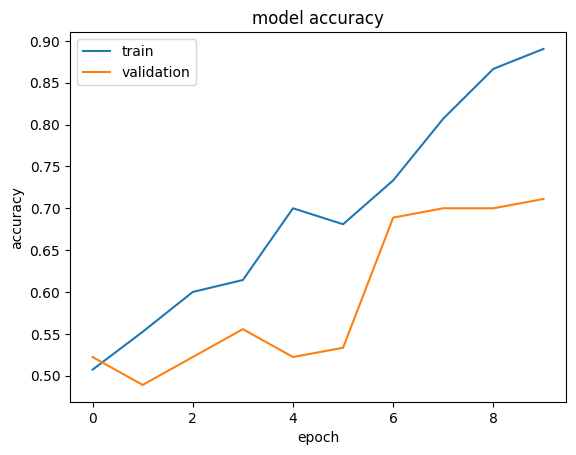

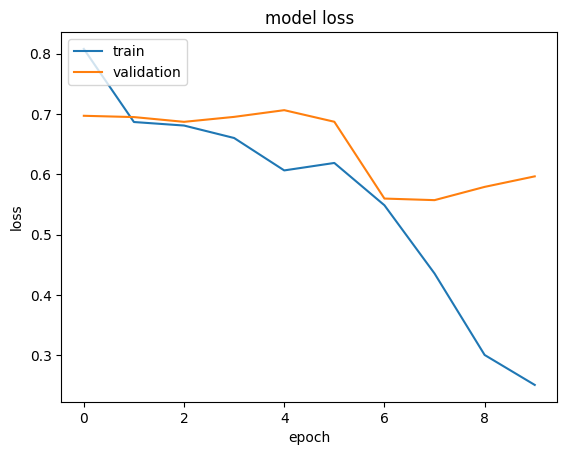

In [6]:
plot_history(history, metric= 'accuracy')
plot_history(history, metric= 'loss')

test other model


In [7]:
conv_base = ResNet50(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

#model
x = conv_base.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(NB_CLASSES, activation="softmax")(x)

model = Model(inputs=conv_base.input, outputs=predictions)

#compile
opti = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
os.getenv("TF_GPU_ALLOCATOR")

'cuda_malloc_async'

In [9]:
model.fit(x_train, y_train, epochs=10, batch_size=BACTH_SIZE, validation_data=(x_val, y_val))

Epoch 1/10


2023-05-26 11:49:37.810713: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 625213440 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 372834304/4104454144
2023-05-26 11:49:37.810738: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      2759393280
InUse:                      2703060753
MaxInUse:                   3024158481
NumAllocs:                       70882
MaxAllocSize:               1526726656
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-05-26 11:49:37.810772: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-05-26 11:49:37.810775: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/model_1/dense_2/MatMul/MatMul_1' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/basile/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/basile/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_15163/3266645775.py", line 1, in <module>
      model.fit(x_train, y_train, epochs=10, batch_size=BACTH_SIZE, validation_data=(x_val, y_val))
    File "/home/basile/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 526, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 259, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/model_1/dense_2/MatMul/MatMul_1'
OOM when allocating tensor with shape[131072,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator gpu_async_0
	 [[{{node gradient_tape/model_1/dense_2/MatMul/MatMul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_29240]